In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob

In [8]:
plt.style.use('seaborn-v0_8-muted')

In [4]:
tfidf = pd.read_csv('tfidf_w_sentiment.csv', index_col = 0)
data = pd.read_csv('mbti_1.csv')

In [5]:
mapper = {'anger':'anger_e',
          'fear':'fear_e',
          'joy':'joy_e',
          'love.1':'love_e',
          'sadness':'sadness_e',
          'surprise':'surprise_e'}

tfidf.rename(mapper = mapper, axis = 1, inplace = True)
tfidf.head()

about       all      also    always        an       and        at  \
0  0.022628  0.091254  0.000000  0.027837  0.067843  0.264456  0.068314   
1  0.020793  0.031446  0.037442  0.025580  0.093516  0.334151  0.031388   
2  0.058417  0.014724  0.000000  0.053899  0.072980  0.256030  0.044092   
3  0.062748  0.063264  0.050216  0.000000  0.031356  0.162968  0.010525   
4  0.031435  0.042258  0.012579  0.012891  0.031417  0.214315  0.021090   

         be   because       but  ...       you      your     youre  label  \
0  0.374517  0.073364  0.000000  ...  0.132503  0.184626  0.031418   INFJ   
1  0.394769  0.033708  0.040718  ...  0.223230  0.053019  0.057743   ENTP   
2  0.455007  0.047351  0.071498  ...  0.185295  0.104267  0.060834   INTP   
3  0.539645  0.045209  0.071678  ...  0.173513  0.063998  0.087125   INTJ   
4  0.683529  0.045298  0.061558  ...  0.163626  0.021374  0.014549   ENTJ   

    anger_e    fear_e     joy_e    love_e  sadness_e  surprise_e  
0  0.135764  0.117830  0.323762  0.081149   0.303030    0.038466  
1  0.138154  0.115532  0.322613  0.088840   0.297431    0.037430  
2  0.129505  0.116293  0.352338  0.078601   0.282931    0.040332  
3  0.145261  0.123895  0.317924  0.076562   0.293479    0.042879  
4  0.141940  0.126254  0.327624  0.075333   0.290540    0.038309  

[5 rows x 107 columns]

In [13]:
# Defining subsets for later use
intp = data[data['type'] == 'INTP']
istp = data[data['type'] == 'ISTP']
entp = data[data['type'] == 'ENTP']
enfp = data[data['type'] == 'ENFP']
isfp = data[data['type'] == 'ISFP']
infp = data[data['type'] == 'INFP']
intj = data[data['type'] == 'INTJ']
infj = data[data['type'] == 'INFJ']
estj = data[data['type'] == 'ESTJ']
entj = data[data['type'] == 'ENTJ']
esfj = data[data['type'] == 'ESFJ']
enfj = data[data['type'] == 'ENFJ']
istj = data[data['type'] == 'ISTJ']
isfj = data[data['type'] == 'ISFJ']
estp = data[data['type'] == 'ESTP']
esfp = data[data['type'] == 'ESFP']

mbtis = ['intp','istp','entp','enfp','isfp','infp','intj','infj',
         'estj','entj','esfj','enfj','istj','isfj','estp','esfp']

posts_bytype = [intp, istp, entp, enfp, isfp, infp, intj, infj,
                estj, entj, esfj, enfj, istj, isfj, estp, esfp]

mbtis_cap = ['INTP','ISTP','ENTP','ENFP','ISFP','INFP','INTJ','INFJ',
             'ESTJ','ENTJ','ESFJ','ENFJ','ISTJ','ISFJ','ESTP','ESFP']

In [12]:
tfidf['polarity'] = ''
tfidf['subjectivity'] = ''

for i in range(len(tfidf.index)):
    p = TextBlob(data.posts[i]).sentiment[0]
    tfidf['polarity'][i] = p
    
    s = TextBlob(data.posts[i]).sentiment[1]
    tfidf['subjectivity'][i] = s
    
tfidf.head()

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['polarity'][i] = p
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf['subjectivity'][i] = s
/var/folders/xp/g_1xt7b13rv42mh6nxh80y200000gp/T/ipykernel_54385/1209398876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

about       all      also    always        an       and        at  \
0  0.022628  0.091254  0.000000  0.027837  0.067843  0.264456  0.068314   
1  0.020793  0.031446  0.037442  0.025580  0.093516  0.334151  0.031388   
2  0.058417  0.014724  0.000000  0.053899  0.072980  0.256030  0.044092   
3  0.062748  0.063264  0.050216  0.000000  0.031356  0.162968  0.010525   
4  0.031435  0.042258  0.012579  0.012891  0.031417  0.214315  0.021090   

         be   because       but  ...     youre  label   anger_e    fear_e  \
0  0.374517  0.073364  0.000000  ...  0.031418   INFJ  0.135764  0.117830   
1  0.394769  0.033708  0.040718  ...  0.057743   ENTP  0.138154  0.115532   
2  0.455007  0.047351  0.071498  ...  0.060834   INTP  0.129505  0.116293   
3  0.539645  0.045209  0.071678  ...  0.087125   INTJ  0.145261  0.123895   
4  0.683529  0.045298  0.061558  ...  0.014549   ENTJ  0.141940  0.126254   

      joy_e    love_e  sadness_e  surprise_e  polarity  subjectivity  
0  0.323762  0.081149   0.303030    0.038466  0.145127      0.469713  
1  0.322613  0.088840   0.297431    0.037430  0.163282      0.545346  
2  0.352338  0.078601   0.282931    0.040332  0.174137      0.618252  
3  0.317924  0.076562   0.293479    0.042879  0.114959      0.524975  
4  0.327624  0.075333   0.290540    0.038309  0.056805       0.52643  

[5 rows x 109 columns]

In [18]:
encoded_label_df = pd.get_dummies(tfidf.label) * 1.0
tfidf = pd.concat([tfidf, encoded_label_df], axis = 1)

tfidf.head()

about       all      also    always        an       and        at  \
0  0.022628  0.091254  0.000000  0.027837  0.067843  0.264456  0.068314   
1  0.020793  0.031446  0.037442  0.025580  0.093516  0.334151  0.031388   
2  0.058417  0.014724  0.000000  0.053899  0.072980  0.256030  0.044092   
3  0.062748  0.063264  0.050216  0.000000  0.031356  0.162968  0.010525   
4  0.031435  0.042258  0.012579  0.012891  0.031417  0.214315  0.021090   

         be   because       but  ...  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
0  0.374517  0.073364  0.000000  ...   0.0   0.0   1.0   0.0   0.0   0.0   
1  0.394769  0.033708  0.040718  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.455007  0.047351  0.071498  ...   0.0   0.0   0.0   0.0   0.0   1.0   
3  0.539645  0.045209  0.071678  ...   0.0   0.0   0.0   0.0   1.0   0.0   
4  0.683529  0.045298  0.061558  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   ISFJ  ISFP  ISTJ  ISTP  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0  

[5 rows x 141 columns]

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

tfidf_bal = pd.concat([tfidf, encoded_label_df], axis = 1)
mean_class_size = int(sum([len(cls) for cls in posts_bytype]) / len(posts_bytype))

downsampled_data = []
upsampled_data = []
c = .99 # Coefficient for class normalization

# Loop through each MBTI dataset
for i in range(len(posts_bytype)):
    # Define class size
    class_size = len(posts_bytype[i])
    # Calculate difference between class size and mean class size
    difference = abs(class_size - mean_class_size)
    # Calculate balancing margin
    k = c * difference
    
    # For majority classes
    if class_size > mean_class_size:
        # Calculate normalized class size
        norm_class_size = int(class_size - k)
        # Downsample
        re_sample = resample(posts_bytype[i], replace = False, n_samples = norm_class_size,
                             random_state = 17)
        # Append downsampled data of current class to list
        downsampled_data.append(re_sample)
        
    # For minority classes
    else:
        # Calculate normalized class size
        norm_class_size = int(class_size + k)
        # Upsample with replacement
        re_sample = resample(posts_bytype[i], replace = True, n_samples = norm_class_size,
                             random_state = 17)
        # Append upsampled data for current class to list of DataFrames
        upsampled_data.append(re_sample)

In [158]:
# Concatenate all downsampled data
downsampled_data_df = pd.concat(downsampled_data)
downsampled_data_df.index.is_unique

True

In [164]:
# Manually append upsampled data to list (resampled with replacement)
upsampled_ls = []

# Loop through dataframes of upsampled classes
for upsampled_class in upsampled_data:
    # Loop through dataframe by index
    for i in upsampled_class.index:
        # Sample to add
        new_sample = tfidf_bal.loc[[i]]
        # Append new sample to list of Series
        upsampled_ls.append(new_sample)
        
upsampled_ls[0].index

Index([2674], dtype='int64')

In [170]:
# Concatenate upsampled data
upsampled_df = pd.concat(upsampled_ls, ignore_index = True)
# Use downsampled data index to subset tfidf dataframe
downsampled_df = tfidf_bal[tfidf_bal.index.isin(downsampled_data_df.index)]
#downsampled_df = downsampled_df.reset_index(drop = True)
downsampled_df.index.is_unique

True

In [172]:
# Concatenate upsampled and downsampled data
df = pd.concat([upsampled_df, downsampled_df], axis = 0, ignore_index = True)
df.head()

about       all      also    always        an       and        at  \
0  0.055003  0.034660  0.033014  0.000000  0.089329  0.241067  0.062273   
1  0.036352  0.014660  0.008728  0.000000  0.021798  0.368206  0.051216   
2  0.021015  0.021188  0.025228  0.000000  0.042006  0.347953  0.074022   
3  0.052516  0.061772  0.073549  0.010768  0.052486  0.349509  0.052850   
4  0.068785  0.011558  0.041286  0.028207  0.148947  0.312632  0.092296   

         be   because       but  ...  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
0  0.461886  0.014861  0.040391  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.537962  0.007857  0.042711  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.255759  0.045424  0.164613  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.255650  0.028378  0.059989  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.479947  0.000000  0.157147  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   ISFJ  ISFP  ISTJ  ISTP  
0   0.0   0.0   0.0   1.0  
1   0.0   0.0   0.0   1.0  
2   0.0   0.0   0.0   1.0  
3   0.0   0.0   0.0   1.0  
4   0.0   0.0   0.0   1.0  

[5 rows x 157 columns]

In [173]:
# Create X and y, where X is all data except label & types and y is encoded types
X = df.drop(['label'] + mbtis_cap, axis = 1)
y = df.iloc[:,-16:]

print(X.shape, y.shape)

(8664, 108) (8664, 16)


In [174]:
# Full train/test split (only for final model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y,
                                                    random_state = 17)

# Train/test split for model selection and tuning
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size = .2,
                                                        stratify = y_train, random_state = 17)

In [185]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 17)
rf.fit(X_train2, y_train2)

print("Random Forest, untuned")
print(f"Accuracy on train set: {rf.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {rf.score(X_test2, y_test2):.4f}")

Random Forest, untuned
Accuracy on train set: 0.9996
Accuracy on test set: 0.5357


In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train2)

print("K-nearest neighbors, untuned")
print(f"Accuracy on train set: {knn.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {knn.score(X_test2, y_test2):.4f}")

K-nearest neighbors, untuned
Accuracy on train set: 0.4562
Accuracy on test set: 0.3353


In [190]:
# Dropping polarity for Naive Bayes
X_train_mnb = X_train2.drop('polarity', axis = 1)
X_test_mnb = X_test2.drop('polarity', axis = 1)

# Single value target for Naive Bayes
y_train_mnb = y_train2.apply(lambda x: x.idxmax(), axis = 1).reset_index(drop = True)
y_test_mnb = y_test2.apply(lambda x: x.idxmax(), axis = 1).reset_index(drop = True)

In [193]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train_mnb)

print("Multinomial Naive Bayes, untuned")
print(f"Accuracy on train set: {mnb.score(X_train_mnb, y_train_mnb):.4f}")
print(f"Accuracy on test set: {mnb.score(X_test_mnb, y_test_mnb):.4f}")

Multinomial Naive Bayes, untuned
Accuracy on train set: 0.2329
Accuracy on test set: 0.2062


Possibly too complex for MNB.

In [206]:
from sklearn.neural_network import MLPClassifier

nnet = MLPClassifier(max_iter = 10000)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, untuned")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, untuned
Accuracy on train set: 0.6721
Accuracy on test set: 0.5274


In [207]:
nnet.n_iter_

2075

Random Forest and MLP classifier are the best! Hyperparameter tuning for both

In [204]:
class_names = tfidf.columns[-16:]

rf_probs = rf.fit(X_train2, y_train_mnb)

probs = rf_probs.predict_proba(X_test2)
probs_array = np.array(probs)

rf_probs_df = pd.DataFrame(probs_array, columns = class_names)
rf_probs_df['y_pred'] = rf_probs.predict(X_test2)
rf_probs_df['true'] = y_test_mnb
rf_probs_df

ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
0     0.03  0.14  0.03  0.03  0.05  0.00  0.00  0.02  0.15  0.10  0.07  0.11   
1     0.04  0.07  0.07  0.13  0.01  0.00  0.01  0.05  0.12  0.11  0.12  0.09   
2     0.03  0.11  0.04  0.09  0.01  0.03  0.02  0.07  0.03  0.05  0.11  0.06   
3     0.00  0.03  0.07  0.04  0.03  0.01  0.00  0.03  0.10  0.19  0.18  0.08   
4     0.07  0.08  0.06  0.05  0.01  0.03  0.00  0.05  0.06  0.08  0.06  0.12   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1382  0.00  0.00  0.00  0.00  0.99  0.00  0.00  0.00  0.01  0.00  0.00  0.00   
1383  0.04  0.07  0.13  0.12  0.00  0.00  0.02  0.03  0.07  0.01  0.18  0.18   
1384  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00   
1385  0.00  0.00  0.00  0.00  0.00  0.99  0.01  0.00  0.00  0.00  0.00  0.00   
1386  0.01  0.09  0.08  0.14  0.03  0.01  0.02  0.07  0.05  0.06  0.10  0.09   

      ISFJ  ISFP  ISTJ  ISTP y_pred  true  
0     0.06  0.11  0.07  0.03   INFJ  INTJ  
1     0.02  0.03  0.05  0.08   ENTP  INTP  
2     0.08  0.06  0.02  0.19   ISTP  INFP  
3     0.03  0.06  0.10  0.05   INFP  INTJ  
4     0.06  0.09  0.10  0.08   INTP  INFJ  
...    ...   ...   ...   ...    ...   ...  
1382  0.00  0.00  0.00  0.00   ESFJ  ESFJ  
1383  0.02  0.03  0.05  0.05   INTJ  INTJ  
1384  0.00  0.00  0.00  0.00   ESTP  ESTP  
1385  0.00  0.00  0.00  0.00   ESFP  ESFP  
1386  0.08  0.05  0.08  0.04   ENTP  ENTJ  

[1387 rows x 18 columns]

In [209]:
nnet_probs = nnet.fit(X_train2, y_train_mnb)

probs = nnet_probs.predict_proba(X_test2)
probs_array = np.array(np.round(probs, 2))

nnet_probs_df = pd.DataFrame(probs_array, columns = class_names)
nnet_probs_df['y_pred'] = nnet_probs.predict(X_test2)
nnet_probs_df['true'] = y_test_mnb
nnet_probs_df

ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
0     0.06  0.24  0.00  0.02   0.0  0.00   0.0  0.00  0.05  0.59  0.02  0.00   
1     0.00  0.00  0.29  0.02   0.0  0.00   0.0  0.00  0.00  0.00  0.55  0.08   
2     0.00  0.00  0.00  0.00   0.0  0.88   0.0  0.00  0.00  0.00  0.06  0.05   
3     0.00  0.00  0.00  0.00   0.0  0.00   0.0  0.00  0.05  0.79  0.16  0.00   
4     0.00  0.00  0.00  0.01   0.0  0.00   0.0  0.00  0.01  0.16  0.00  0.01   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1382  0.00  0.00  0.00  0.00   1.0  0.00   0.0  0.00  0.00  0.00  0.00  0.00   
1383  0.00  0.00  0.01  0.00   0.0  0.00   0.0  0.00  0.00  0.00  0.53  0.45   
1384  0.00  0.00  0.00  0.00   0.0  0.00   0.0  1.00  0.00  0.00  0.00  0.00   
1385  0.00  0.00  0.00  0.00   0.0  0.95   0.0  0.00  0.00  0.00  0.05  0.00   
1386  0.00  0.00  0.01  0.00   0.0  0.01   0.0  0.98  0.00  0.00  0.00  0.00   

      ISFJ  ISFP  ISTJ  ISTP y_pred  true  
0      0.0  0.01  0.00  0.00   INFP  INTJ  
1      0.0  0.00  0.02  0.03   INTJ  INTP  
2      0.0  0.02  0.00  0.00   ESFP  INFP  
3      0.0  0.00  0.00  0.00   INFP  INTJ  
4      0.0  0.81  0.00  0.00   ISFP  INFJ  
...    ...   ...   ...   ...    ...   ...  
1382   0.0  0.00  0.00  0.00   ESFJ  ESFJ  
1383   0.0  0.00  0.00  0.01   INTJ  INTJ  
1384   0.0  0.00  0.00  0.00   ESTP  ESTP  
1385   0.0  0.00  0.00  0.00   ESFP  ESFP  
1386   0.0  0.00  0.00  0.00   ESTP  ENTJ  

[1387 rows x 18 columns]

In [210]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt'],
              'bootstrap': [True, False]}

rf_gs = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1)
rf_gs.fit(X_train, y_train)

print("Best parameters found:", rf_gs.best_params_)
print("Best cross-validation score:", rf_gs.best_score_)

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.540755791512821


Random Forest:
Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.5408

In [215]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train2, y_train2)

print("Random Forest, tuned")
print(f"Accuracy on train set: {rf.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {rf.score(X_test2, y_test2):.4f}")

Random Forest, tuned
Accuracy on train set: 1.0000
Accuracy on test set: 0.5357


In [211]:
# MLP Classifier hyperparameter tuning
param_grid = {'hidden_layer_sizes': [100, 200, 300], # Mistake
              'activation': ['relu', 'tanh'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive']}

nnet = MLPClassifier(max_iter = 10000, random_state = 17)

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 5, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.5765377536826708


MLP classifier:
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.5765

In [212]:
# Trying best params with higher max iterations
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = 300, random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, tuned")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, tuned
Accuracy on train set: 1.0000
Accuracy on test set: 0.5616


In [213]:
# Trying grid search again with higher max iterations
param_grid = {'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
              'activation': ['relu', 'tanh'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive']}

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 3, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.5305121437531649


In [214]:
# Testing again with new params
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,50), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, tuned")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, tuned
Accuracy on train set: 0.7897
Accuracy on test set: 0.5797


Test set accuracy is improved but underfit. Try adding one more hidden layer?

In [218]:
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,50,50), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, 3 hidden layers")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, 3 hidden layers
Accuracy on train set: 0.8350
Accuracy on test set: 0.5616


Adding another hidden layer (50) improved the fit but worsened performance. Try increasing size of second layer?

In [219]:
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,50), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, (100,100,50)")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, (100,100,50)
Accuracy on train set: 0.9901
Accuracy on test set: 0.5652


Better. Try increasing size of third layer, try adding a fourth layer.

In [220]:
nnet1 = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,100), random_state = 17)
nnet1.fit(X_train2, y_train2)

print("nnet1: Multilayer perceptron classifier, (100,100,100)")
print(f"Accuracy on train set: {nnet1.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet1.score(X_test2, y_test2):.4f}")

nnet2 = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,50,50), random_state = 17)
nnet2.fit(X_train2, y_train2)

print("nnet2: Multilayer perceptron classifier, (100,100,50,50)")
print(f"Accuracy on train set: {nnet2.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet2.score(X_test2, y_test2):.4f}")

nnet1: Multilayer perceptron classifier, (100,100,100)
Accuracy on train set: 1.0000
Accuracy on test set: 0.5674
nnet2: Multilayer perceptron classifier, (100,100,50,50)
Accuracy on train set: 0.8126
Accuracy on test set: 0.5588


4-layer network?

In [221]:
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,100,100), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, (100,100,100,100)")
print(f"Accuracy on train set: {nnet1.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet1.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, (100,100,100,100)
Accuracy on train set: 1.0000
Accuracy on test set: 0.5674


No improvement when increasing complexity beyond 3 hidden layers.

In [223]:
# Grid search on the 2-layer (100,50) and 3-layer (100,100,100) options
nnet = MLPClassifier(random_state = 17)

param_grid = {'hidden_layer_sizes': [(100,50),(100,100,100)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive', 'invscaling'],
              'max_iter': [2500, 10000, 15000],
              'early_stopping': [True, False]}

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 3, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteratio

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to conv

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to conv

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to conv

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (sta

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (sta

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
S

Best parameters found: {'activation': 'tanh', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'max_iter': 2500, 'solver': 'lbfgs'}
Best cross-validation score: 0.5525878179707692


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best parameters found: {'activation': 'tanh', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'max_iter': 2500, 'solver': 'lbfgs'}
Best cross-validation score: 0.5525878179707692

In [225]:
nnet1 = MLPClassifier(hidden_layer_sizes = (100,100,100), activation = 'tanh', solver = 'lbfgs',
                     alpha = .01, max_iter = 2500, early_stopping = True, random_state = 17)
nnet1.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, final")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, final
Accuracy on train set: 1.0000
Accuracy on test set: 0.5710


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [227]:
# Final model
final_model = MLPClassifier(hidden_layer_sizes = (100,100,100), activation = 'tanh', solver = 'lbfgs',
                     alpha = .01, max_iter = 2500, early_stopping = True, random_state = 17)
final_model.fit(X_train, y_train)

print("Multilayer perceptron classifier, final 1")
print(f"Accuracy on train set: {final_model.score(X_train, y_train):.4f}")
print(f"Accuracy on test set: {final_model.score(X_test, y_test):.4f}")

Multilayer perceptron classifier, final 1
Accuracy on train set: 1.0000
Accuracy on test set: 0.5955


/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [282]:
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test)
cr_dict = classification_report(y_test, y_pred, target_names = class_names, output_dict = True)
report = pd.DataFrame(cr_dict)
report = report.round(decimals = 2)
report

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENFJ    ENFP    ENTJ    ENTP    ESFJ    ESFP    ESTJ    ESTP  \
precision    0.82    0.22    0.76    0.28    0.95    0.91    0.96    0.88   
recall       0.87    0.13    0.81    0.19    1.00    1.00    1.00    0.99   
f1-score     0.84    0.16    0.78    0.23    0.97    0.95    0.98    0.93   
support    108.00  109.00  108.00  109.00  107.00  107.00  107.00  107.00   

             INFJ    INFP    INTJ    INTP    ISFJ    ISFP    ISTJ    ISTP  \
precision    0.16    0.15    0.22    0.24    0.85    0.76    0.84    0.74   
recall       0.08    0.10    0.16    0.22    0.94    0.81    0.94    0.72   
f1-score     0.11    0.12    0.18    0.23    0.89    0.79    0.89    0.73   
support    110.00  111.00  109.00  110.00  108.00  108.00  107.00  108.00   

           micro avg  macro avg  weighted avg  samples avg  
precision       0.67       0.61          0.60         0.61  
recall          0.62       0.62          0.62         0.62  
f1-score        0.64       0.61          0.61         0.61  
support      1733.00    1733.00       1733.00      1733.00

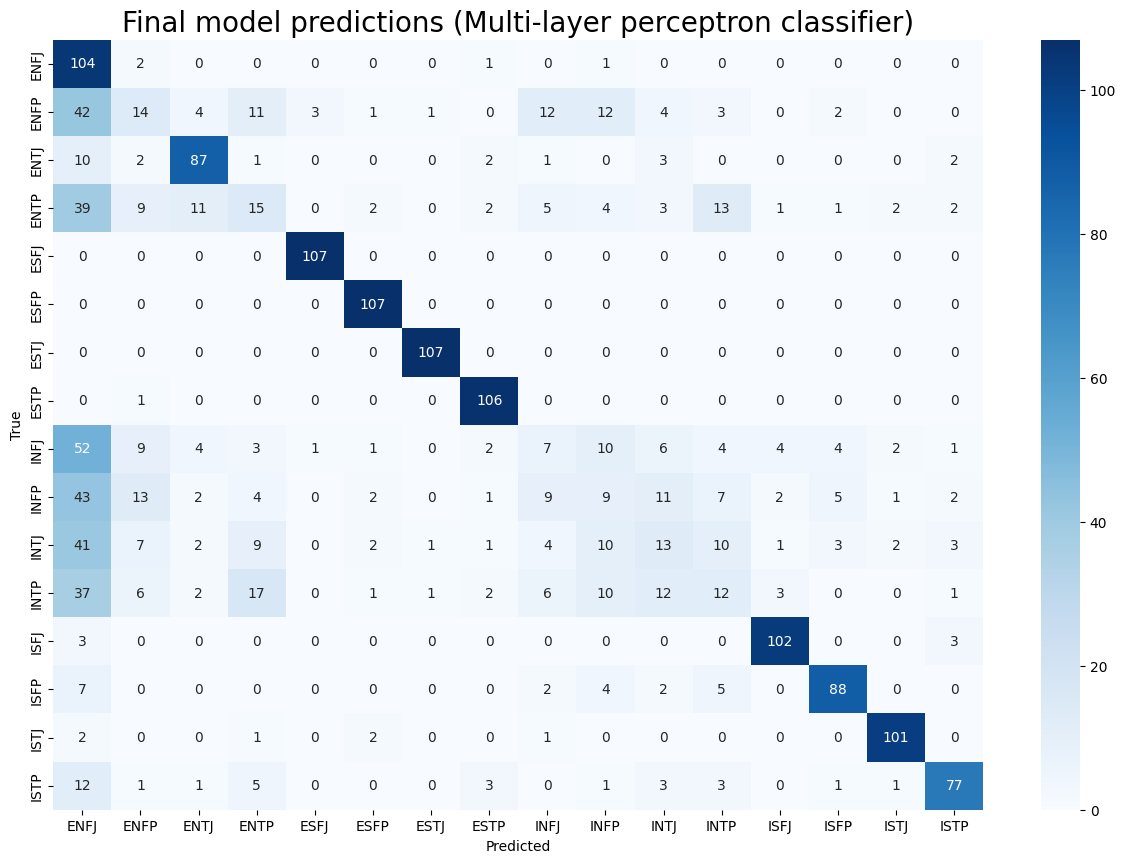

In [244]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.argmax(y_test, axis = 1)
y_pred_multiclass = np.argmax(y_pred, axis = 1)
cm = confusion_matrix(y_true, y_pred_multiclass)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g',
            xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final model predictions (Multi-layer perceptron classifier)', fontsize = 20)
plt.show()

ENFJ gets over-predicted.
Model seems most confused with ENFP, ENTP, INFJ, INFP, INTJ, and INTP.
Does great with ENTJ, ESFJ, ESFP, ESTJ, ESTP, ISFJ, ISTJ, and ISTP - most of which were definitely minority classes...

In [285]:
data.type.value_counts(ascending = True)

type
ESTJ      39
ESFJ      42
ESFP      48
ESTP      89
ISFJ     166
ENFJ     190
ISTJ     205
ENTJ     231
ISFP     271
ISTP     337
ENFP     675
ENTP     685
INTJ    1091
INTP    1304
INFJ    1470
INFP    1832
Name: count, dtype: int64

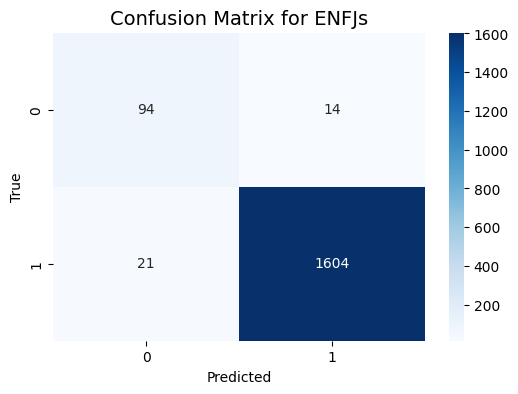

In [250]:
# Confusion matrix only on ENFJ
y_true_enfj = y_test.iloc[:, 0].values
y_pred_enfj = y_pred[:, 0]

y_true_binary = np.where(y_true_enfj == 0, 1, 0)
y_pred_binary = np.where(y_pred_enfj == 0, 1, 0)

# Compute the confusion matrix
#cm = confusion_matrix(y_true_enfj, y_pred_enfj)
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ENFJs', fontsize = 14)
plt.show()

In [271]:
y_pred_df = pd.DataFrame(y_pred, columns = class_names)
y_pred_df['label'] = y_pred_df.apply(lambda x: x.idxmax(), axis = 1)
y_pred_df

ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
0        0     0     0     0     0     0     0     0     0     0     0     0   
1        0     0     0     0     0     0     0     0     0     0     0     0   
2        1     0     0     0     0     0     0     0     0     0     0     0   
3        0     0     0     0     0     1     0     0     0     0     0     0   
4        0     0     0     0     0     0     0     0     0     1     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1728     0     0     0     0     0     1     0     0     0     0     0     0   
1729     1     0     0     0     0     0     0     0     0     0     0     0   
1730     0     0     0     0     0     0     0     0     0     1     0     0   
1731     0     0     0     0     0     0     0     0     0     0     0     0   
1732     0     0     0     0     0     1     0     0     0     0     0     0   

      ISFJ  ISFP  ISTJ  ISTP label  
0        0     0     0     0  ENFJ  
1        0     0     0     0  ENFJ  
2        0     0     0     0  ENFJ  
3        0     0     0     0  ESFP  
4        0     0     0     0  INFP  
...    ...   ...   ...   ...   ...  
1728     0     0     0     0  ESFP  
1729     0     0     0     0  ENFJ  
1730     0     0     0     0  INFP  
1731     0     0     0     0  ENFJ  
1732     0     0     0     0  ESFP  

[1733 rows x 17 columns]

In [275]:
probs = final_model.predict_proba(X_test)
probs_array = np.round(np.array(probs), decimals = 2)

pred_probs_df = pd.DataFrame(probs_array, columns = class_names)
pred_probs_df['y_pred'] = y_pred_df['label']
pred_probs_df['true'] = class_names[y_true]
pred_probs_df.sample(15)

ENFJ  ENFP  ENTJ  ENTP  ESFJ  ESFP  ESTJ  ESTP  INFJ  INFP  INTJ  INTP  \
666    0.0  0.00  0.00  0.00   0.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
365    0.0  0.00  0.00  0.00   1.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
801    0.0  0.00  0.00  0.00   0.0  0.99   0.0   0.0   0.0  0.00  0.00   0.0   
1492   0.0  0.00  0.00  0.99   0.0  0.00   0.0   0.0   0.0  0.00  0.35   0.0   
102    0.0  0.00  0.00  0.00   0.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
315    0.0  0.00  0.00  0.00   1.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
1608   0.0  0.00  0.00  0.00   0.0  0.80   0.0   0.0   0.0  0.00  0.00   0.0   
1627   0.0  0.05  1.00  0.03   0.0  0.00   0.0   0.0   0.0  0.00  0.03   0.0   
984    0.0  0.01  0.00  0.91   0.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
1578   0.0  0.00  0.00  0.00   0.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
1274   0.0  0.00  0.00  0.00   0.0  0.00   0.0   0.0   0.0  1.00  0.00   0.0   
484    0.0  0.00  0.00  0.00   0.0  0.00   0.0   0.0   0.0  0.58  0.00   0.0   
488    0.0  0.00  0.14  0.00   0.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   
128    0.0  0.00  0.00  0.00   0.0  0.00   1.0   0.0   0.0  0.00  0.00   0.0   
355    0.0  0.00  0.00  0.01   0.0  0.00   0.0   0.0   0.0  0.00  0.00   0.0   

      ISFJ  ISFP  ISTJ  ISTP y_pred  true  
666   1.00  0.00   0.0   0.0   ISFJ  ISFJ  
365   0.00  0.00   0.0   0.0   ESFJ  ESFJ  
801   0.97  0.00   0.0   0.0   ESFP  INTJ  
1492  0.00  0.00   0.0   0.0   ENTP  ENTP  
102   1.00  0.00   0.0   0.0   ISFJ  ISFJ  
315   0.00  0.00   0.0   0.0   ESFJ  ESFJ  
1608  0.00  0.00   0.0   0.0   ESFP  INFP  
1627  0.00  0.00   0.0   0.0   ENTJ  ENFP  
984   0.00  0.73   0.0   0.0   ENTP  ENFP  
1578  0.00  0.00   0.0   0.0   ENFJ  INFJ  
1274  0.00  0.00   0.0   0.0   INFP  ENFP  
484   0.00  0.00   0.0   0.0   INFP  INTP  
488   0.00  0.00   0.0   0.0   ENFJ  INTP  
128   0.00  0.00   0.0   0.0   ESTJ  ESTJ  
355   0.00  0.00   0.0   0.0   ENFJ  ENFP